<a href="https://colab.research.google.com/github/Brynlai/DataScienceHeartDiseaseAssignment/blob/Bryan/AssignmentCompletedV22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B. Data Understanding
1. Data Collection
2. Data Description
3. Data Exploration

## B.1. Data Collection

In [ ]:
# B. Data Understanding - 1. Data Collection
# @title
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fetch Heart Disease dataset from UCI ML Repository
heart_disease_bunch = fetch_ucirepo(id=45)

# Load into DataFrame
heart_disease = pd.DataFrame(data=heart_disease_bunch.data.features,
                             columns=heart_disease_bunch.data.feature_names,
                             index=heart_disease_bunch.data.ids)
heart_disease = pd.concat([heart_disease, heart_disease_bunch.data.targets], axis=1)

## B.2. Data Description

In [ ]:
# B. Data Understanding: - 2. Data Description
def print_col(col):
  # Get fequency of each result in groups
  group_sizes = df.groupby(col).size()
  print(f"Column: {'col'}")
  print(group_sizes)
  print()

def print_group_sizes(df):
    for column in df.columns:
        # Get fequency of each result in groups
        print_col(column)

In [ ]:
# Copy hear_disease to df.
df = heart_disease

# Show column names, null value count and data type
print(df.info())

# Rename num to target.
df = df.rename(columns={'num': 'target'})


# Rename Columns to make them more readable
column_names = {
    "age": "Age",
    "sex": "Gender",
    "cp": "ChestPainType",
    "trestbps": "RestingBP",
    "fbs": "FastBloodSugar",
    "restecg": "RestingECG",
    "exang": "ExerciseAngina",
    "slope": "ExerciseSlope",
    "ca": "MajorVessels",
    "thal": "ThalliumStress",
    "target": "HeartDisease",
    "chol": "SerumCholesterol",
    "thalach": "MaxHeartRate",
    "oldpeak": "OldPeak"
}
df.rename(columns=column_names, inplace=True)
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
   Age  Gender  ChestPainType  RestingBP  SerumCholesterol  FastBloodSugar  \
0   63       1              1        145               233               1   
1   67       1              4        160               286

## B.3 Data Exploration

In [ ]:
# B. Data Understanding: - 3. Data Exploration
# Show data types and null
print(df.info())

# Summary Statistics
summary_stats = df.describe()
print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               303 non-null    int64  
 1   Gender            303 non-null    int64  
 2   ChestPainType     303 non-null    int64  
 3   RestingBP         303 non-null    int64  
 4   SerumCholesterol  303 non-null    int64  
 5   FastBloodSugar    303 non-null    int64  
 6   RestingECG        303 non-null    int64  
 7   MaxHeartRate      303 non-null    int64  
 8   ExerciseAngina    303 non-null    int64  
 9   OldPeak           303 non-null    float64
 10  ExerciseSlope     303 non-null    int64  
 11  MajorVessels      299 non-null    float64
 12  ThalliumStress    301 non-null    float64
 13  HeartDisease      303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
              Age      Gender  ChestPainType   RestingBP  SerumCholesterol  \
count  3

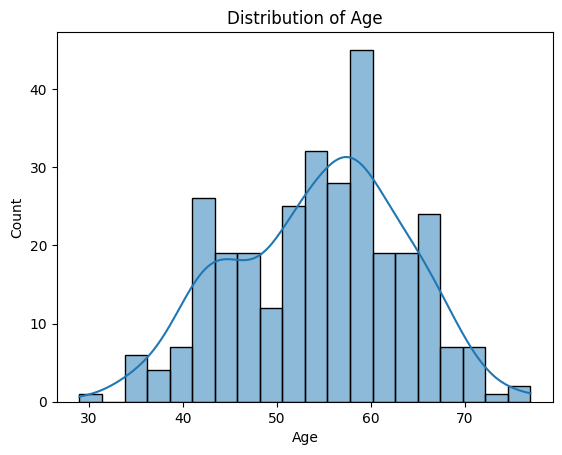

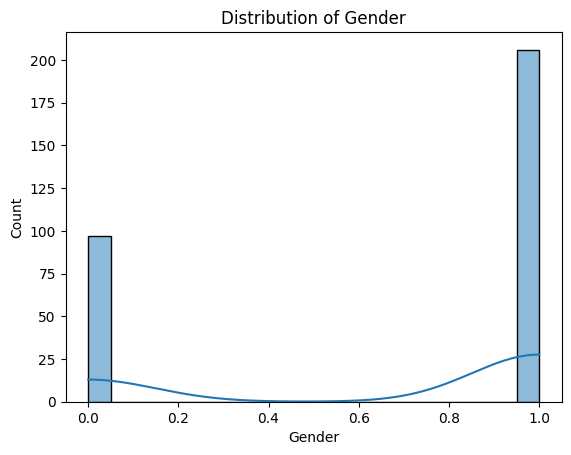

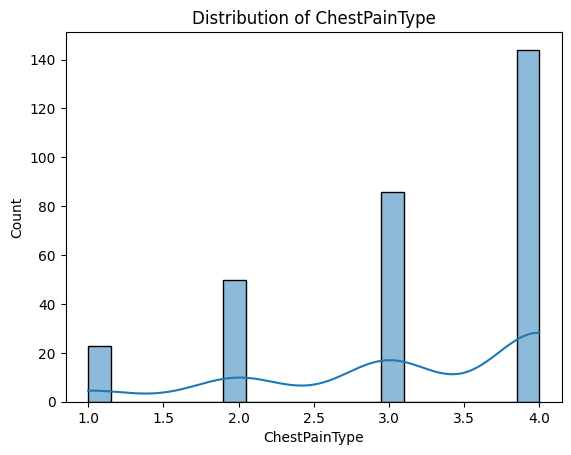

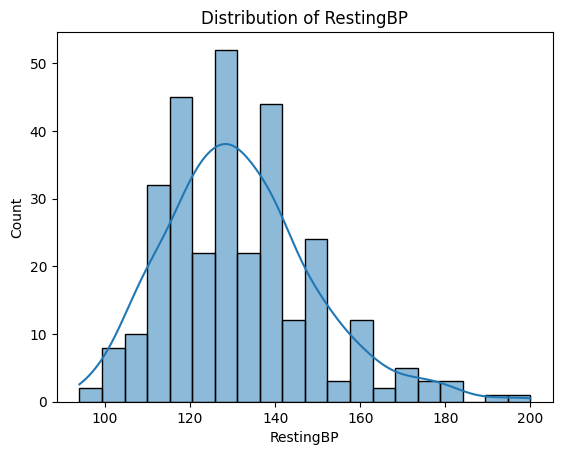

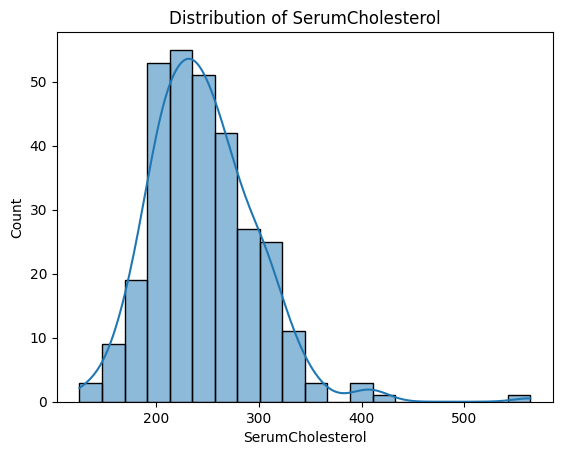

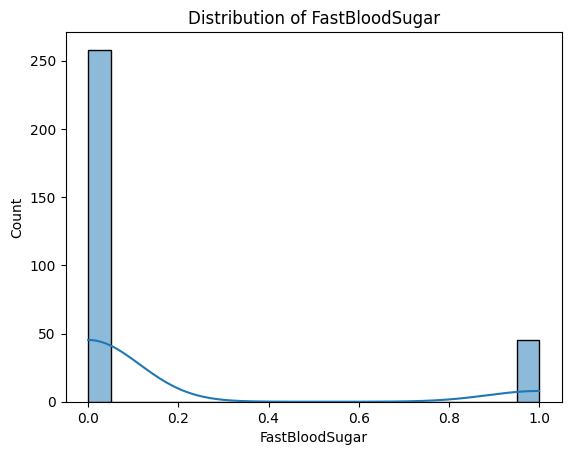

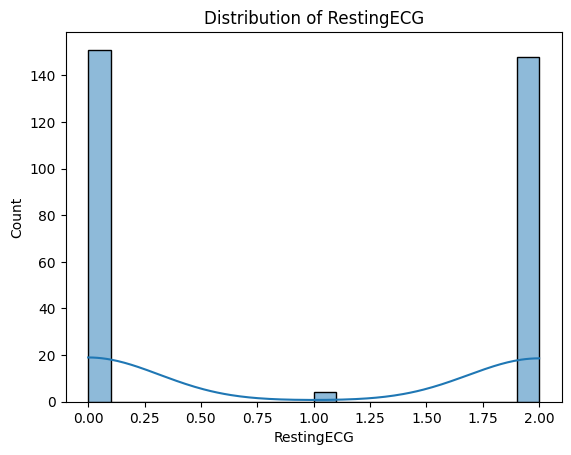

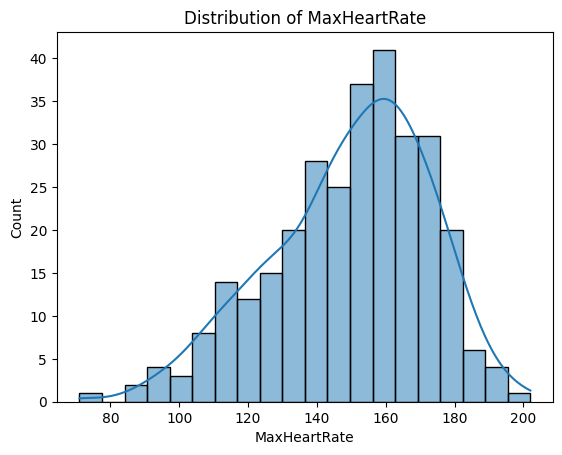

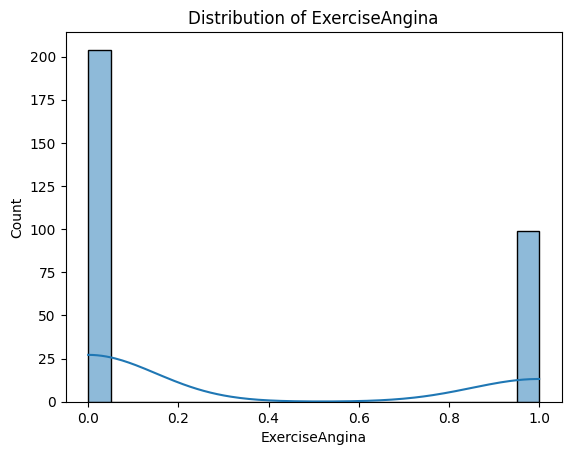

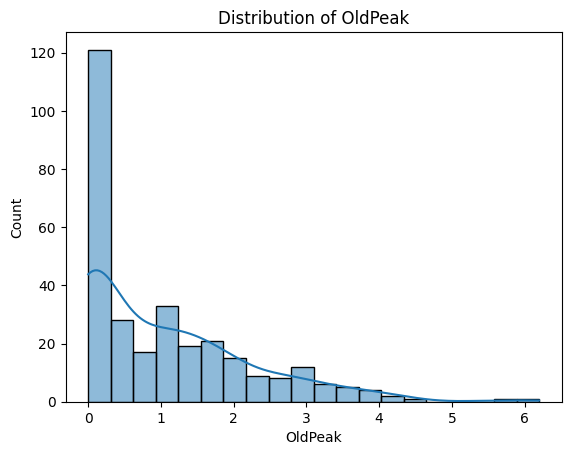

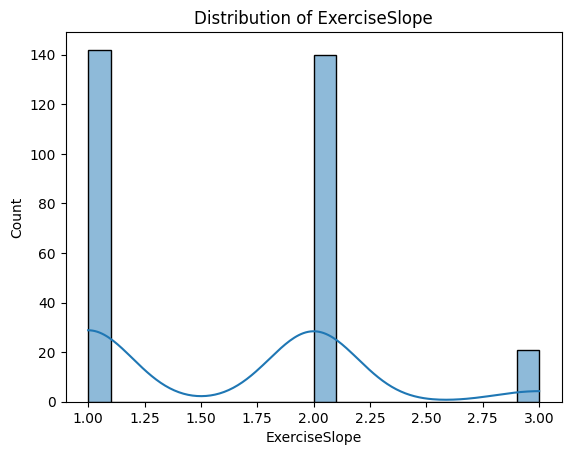

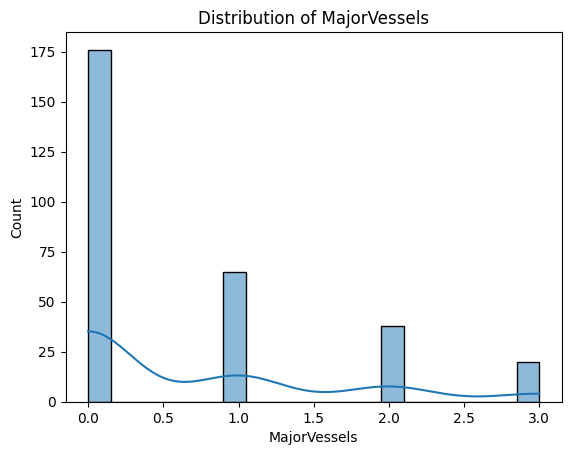

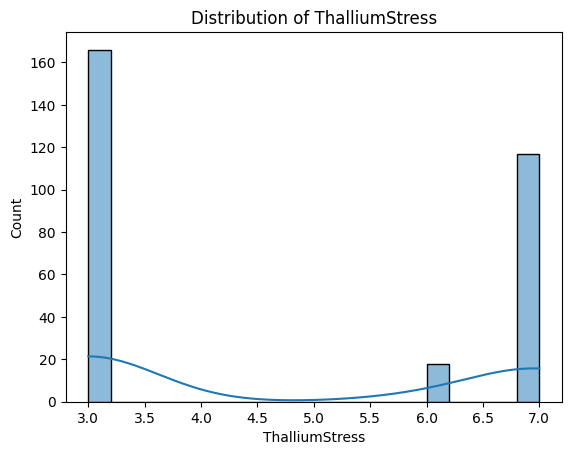

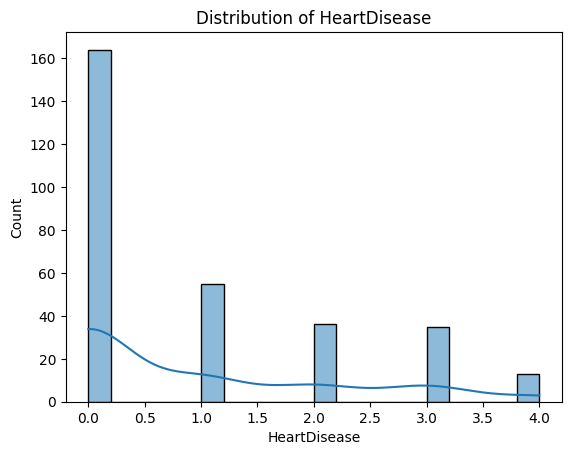

In [ ]:
# Distribution Plots of the columns values
for column in df.columns:
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

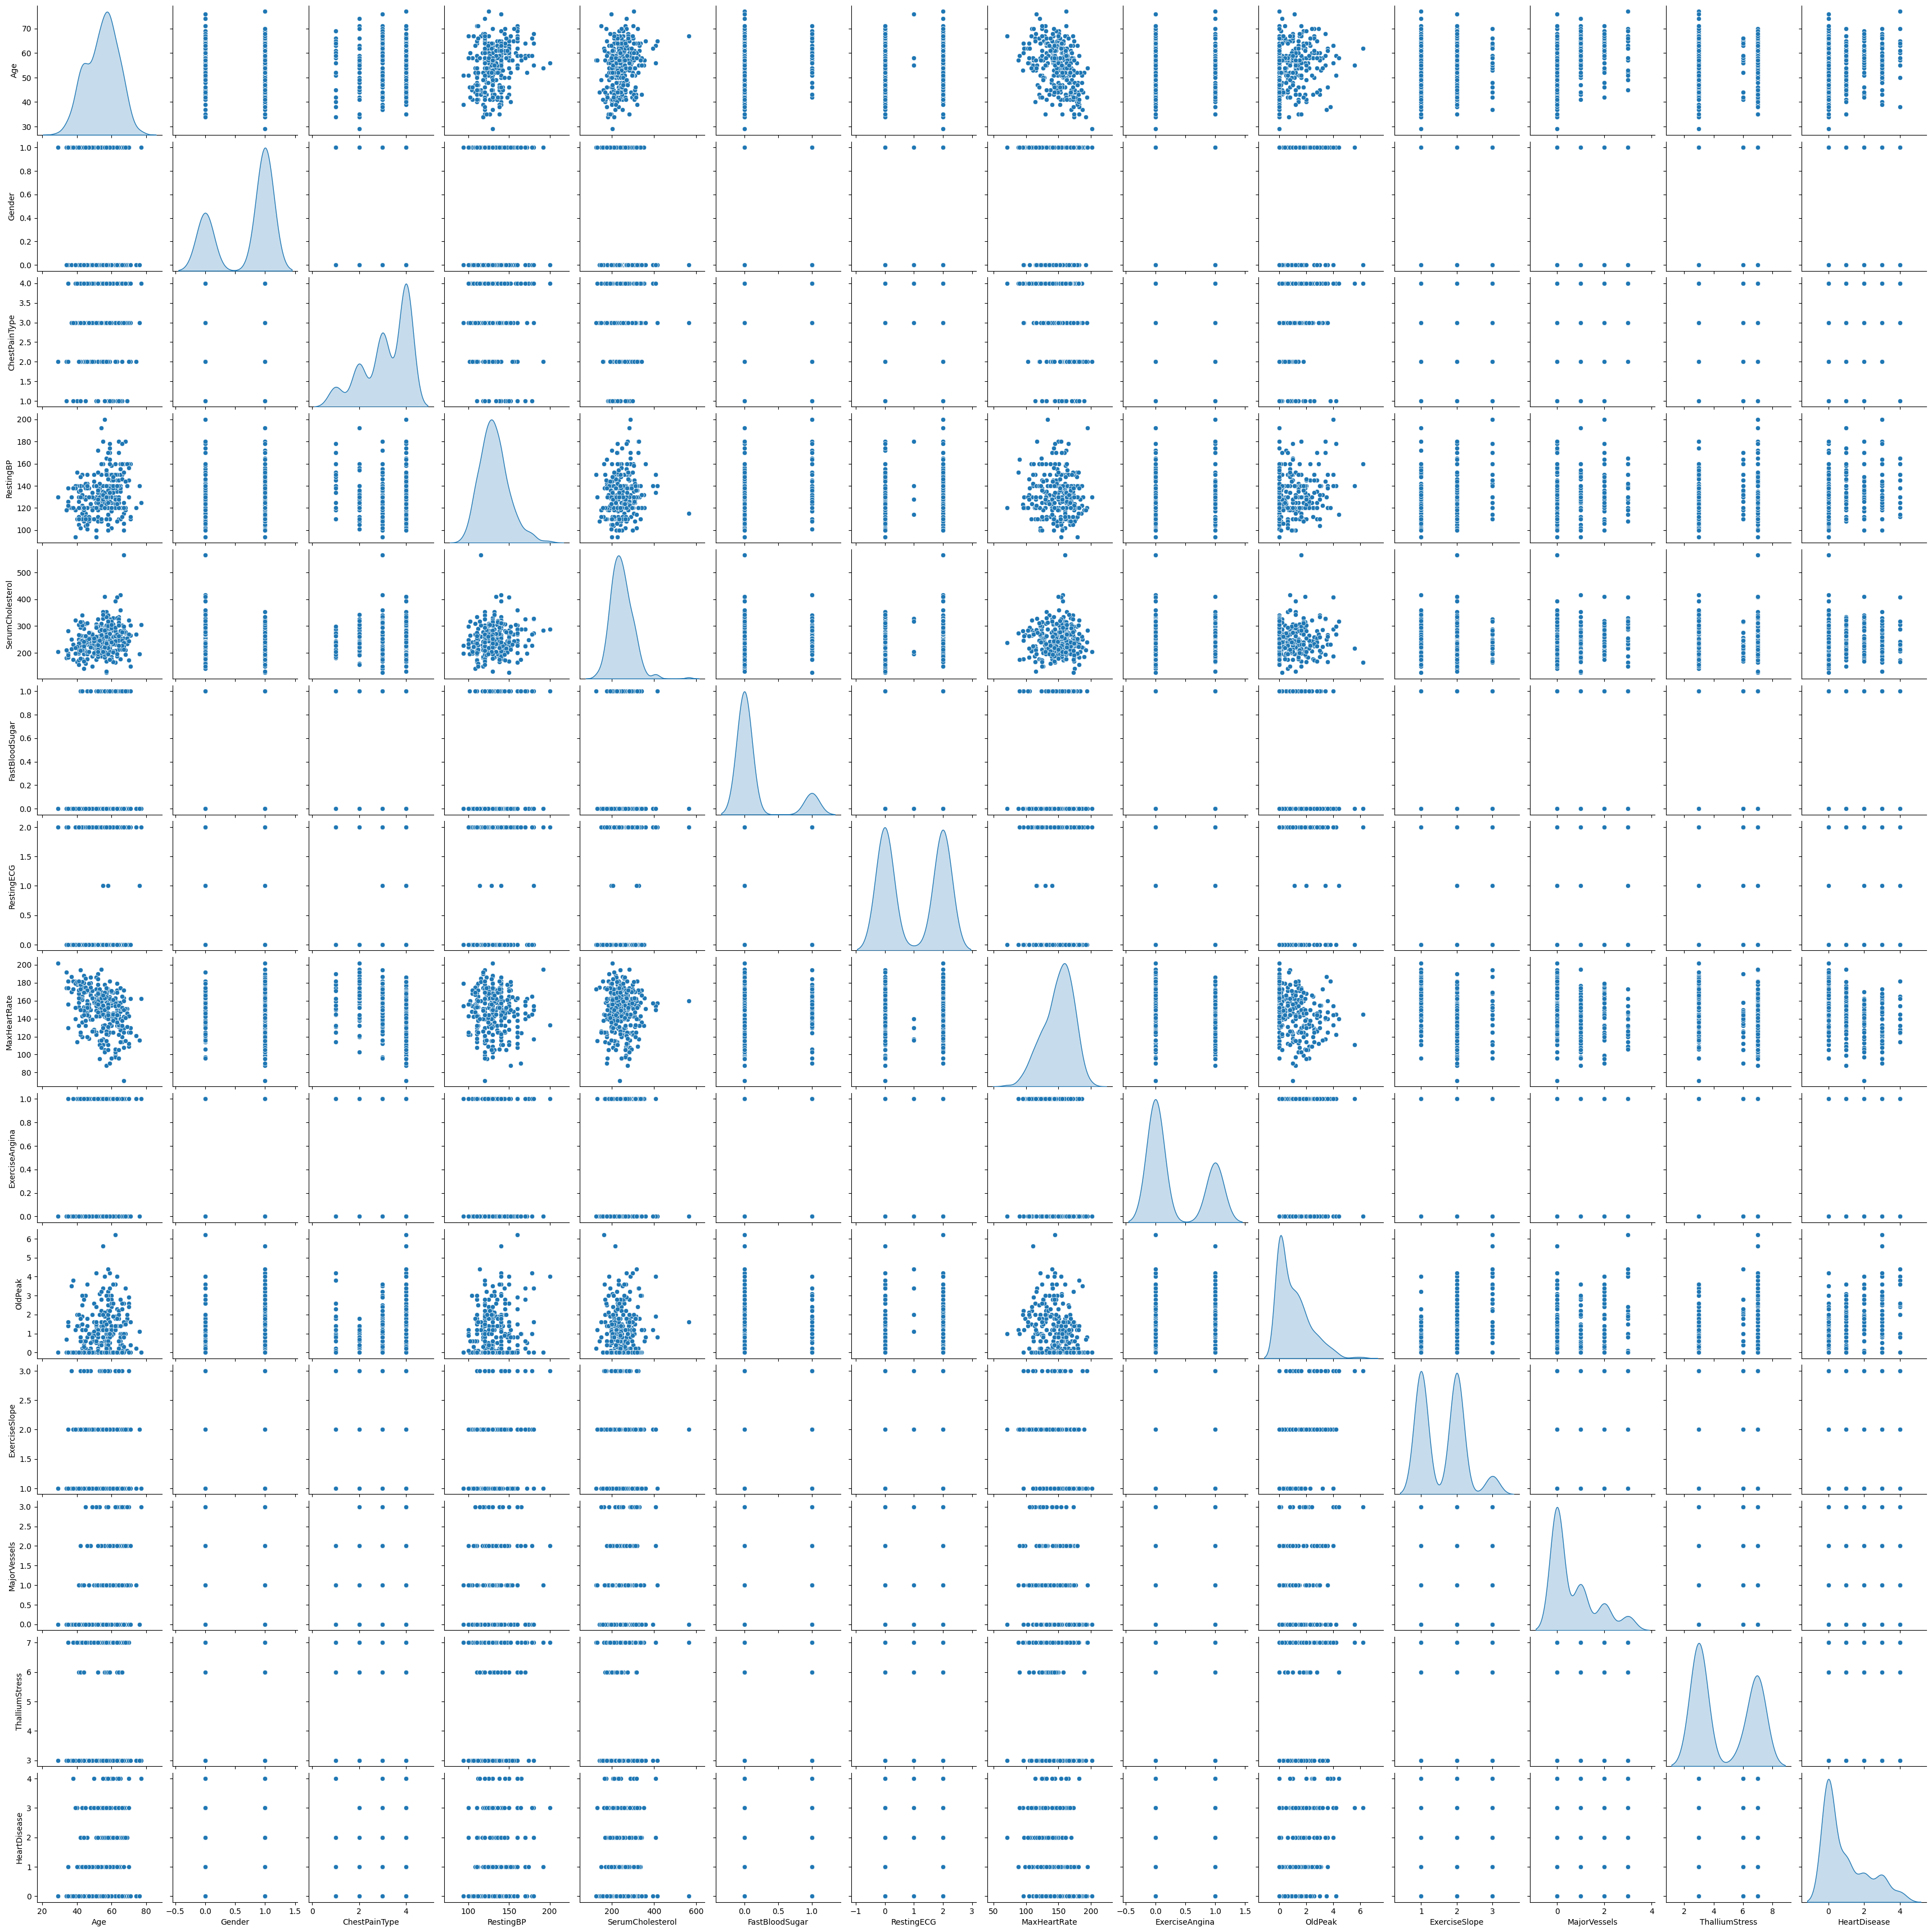

In [ ]:
# Create a pair plot with customization
sns.pairplot(df, vars=df.columns, diag_kind='kde', markers='o')
plt.show()

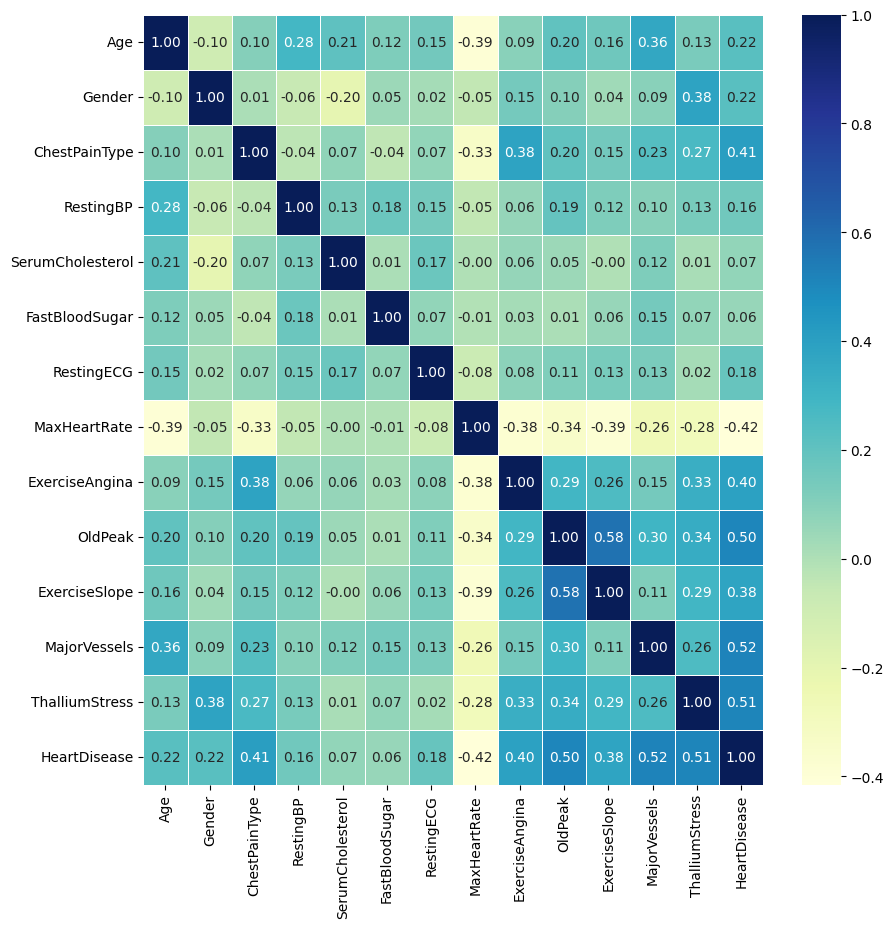

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()
plt.show()

# C. Data Preperation
1. Data Cleaning
2. Data transformation

## C.1. Data Cleaning

In [ ]:
# C. Data Preperation - 1. Data Cleaning
# Check for any duplicate observation
duplicate_rows = df.duplicated()
print("Number of duplicate rows before:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows again
duplicate_rows = df.duplicated()
print("Number of duplicate rows after:", duplicate_rows.sum())

Number of duplicate rows before: 0
Number of duplicate rows after: 0


In [ ]:
# C. Data Preperation - 1. Data Cleaning
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace missing values with median of each column, only if the column is numerical
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
        df[column] = df[column].fillna(df[column].median())

# Check if there are any missing values left
missing_values_after = df.isnull().sum()
print("Missing values after replacing with medians:")
print(missing_values_after)

Missing values in each column:
Age                 0
Gender              0
ChestPainType       0
RestingBP           0
SerumCholesterol    0
FastBloodSugar      0
RestingECG          0
MaxHeartRate        0
ExerciseAngina      0
OldPeak             0
ExerciseSlope       0
MajorVessels        4
ThalliumStress      2
HeartDisease        0
dtype: int64
Missing values after replacing with medians:
Age                 0
Gender              0
ChestPainType       0
RestingBP           0
SerumCholesterol    0
FastBloodSugar      0
RestingECG          0
MaxHeartRate        0
ExerciseAngina      0
OldPeak             0
ExerciseSlope       0
MajorVessels        0
ThalliumStress      0
HeartDisease        0
dtype: int64


Outliers List

Outliers in RestingBP: [200, 192]
Outliers in SerumCholesterol: [417, 407, 564, 409]
Outliers in MaxHeartRate: [71]
Outliers in OldPeak: [6.2, 5.6]



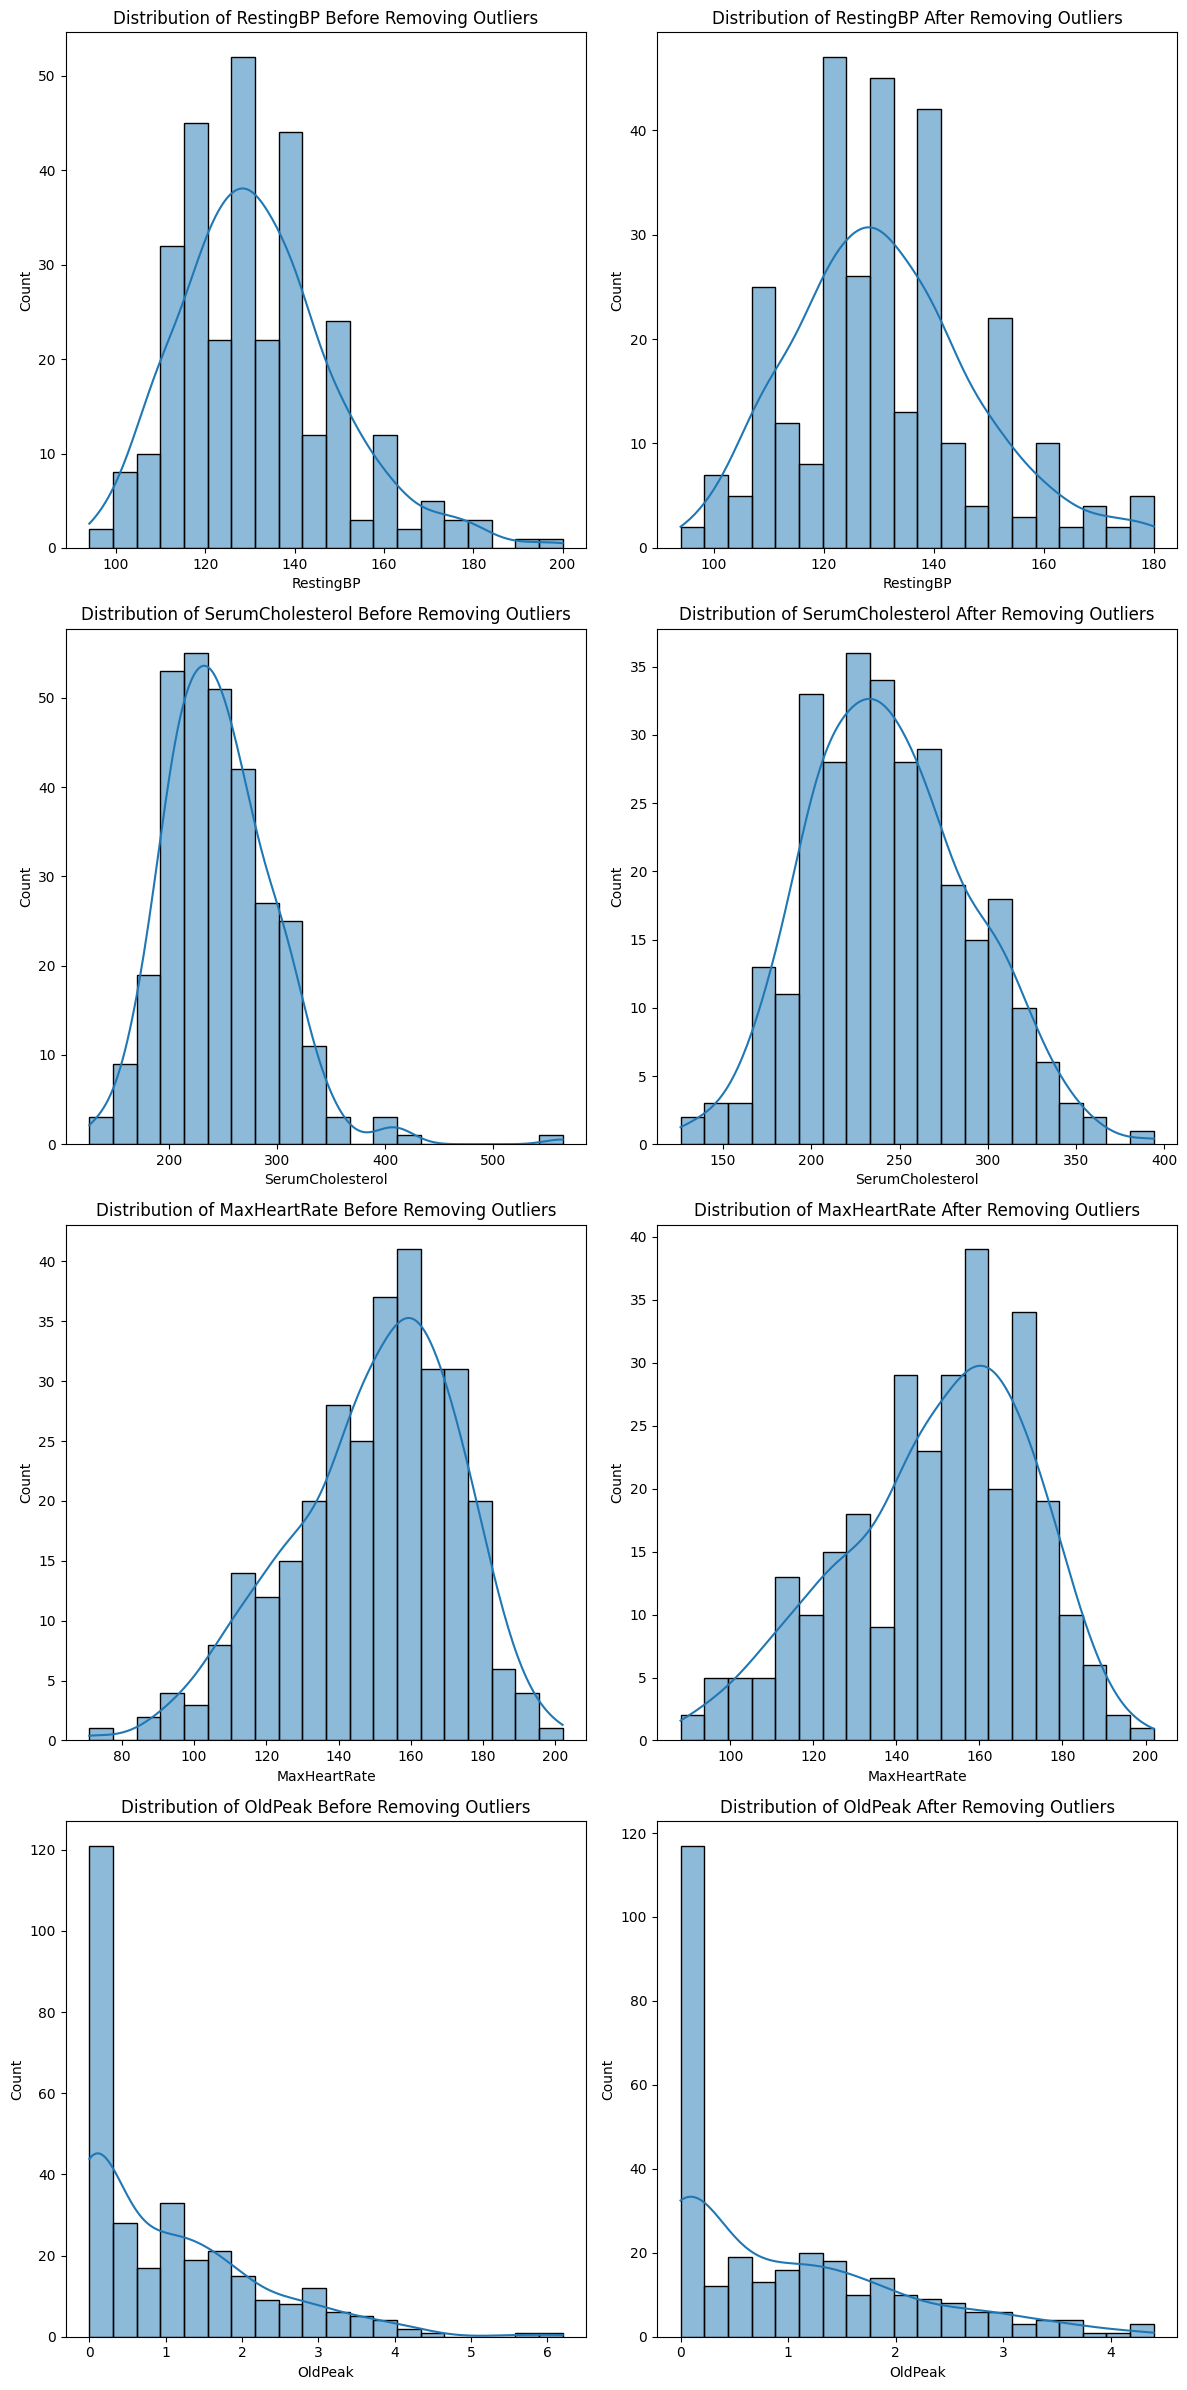

In [ ]:
# C. Data Preperation - 1. Data Cleaning
def remove_outliers(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        z_scores = np.abs((df[column] - mean) / std)
        outlier_indices = z_scores >= threshold
        outliers[column] = df[column][outlier_indices].tolist()
        df = df[~outlier_indices]
    return df, outliers

# Specify columns to check for outliers
columns_to_check = ['RestingBP', 'SerumCholesterol', 'MaxHeartRate', 'OldPeak']

# Remove outliers from the DataFrame and print the outliers
df_cleaned, outliers = remove_outliers(df, columns_to_check)

# Print the outliers for each column
print("Outliers List\n")
for column, outlier_list in outliers.items():
    print(f"Outliers in {column}: {outlier_list}")
print()


# Create distribution plots before and after removing outliers
fig, axes = plt.subplots(nrows=len(columns_to_check), ncols=2, figsize=(12, 6*len(columns_to_check)))
for i, column in enumerate(columns_to_check):
    sns.histplot(df[column], ax=axes[i, 0], kde=True, bins=20)
    axes[i, 0].set_title(f'Distribution of {column} Before Removing Outliers')
    sns.histplot(df_cleaned[column], ax=axes[i, 1], kde=True, bins=20)
    axes[i, 1].set_title(f'Distribution of {column} After Removing Outliers')
plt.tight_layout()
plt.show()

## C.2. Data Transformation

In [ ]:
# Before
print_col('HeartDisease')

# Change anything above 0 into 1
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x > 0 else 0)

# After
print_col('HeartDisease')

Column: col
HeartDisease
0    164
1     55
2     36
3     35
4     13
dtype: int64

Column: col
HeartDisease
0    164
1    139
dtype: int64



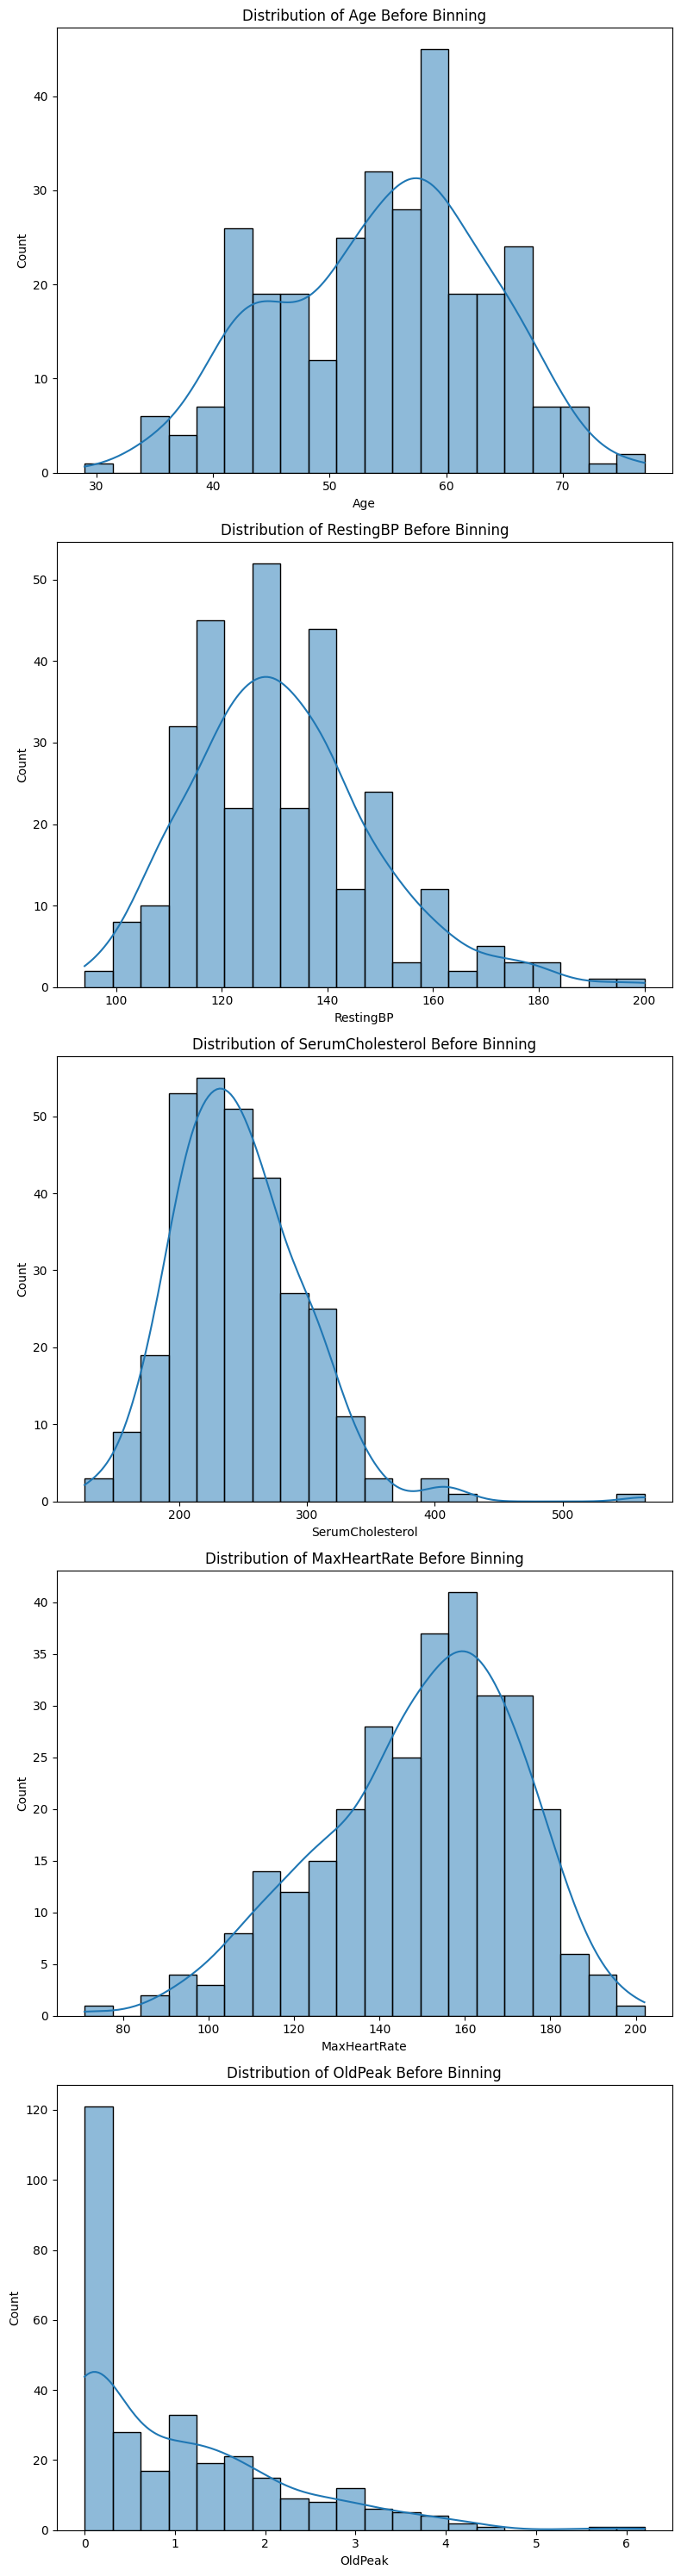

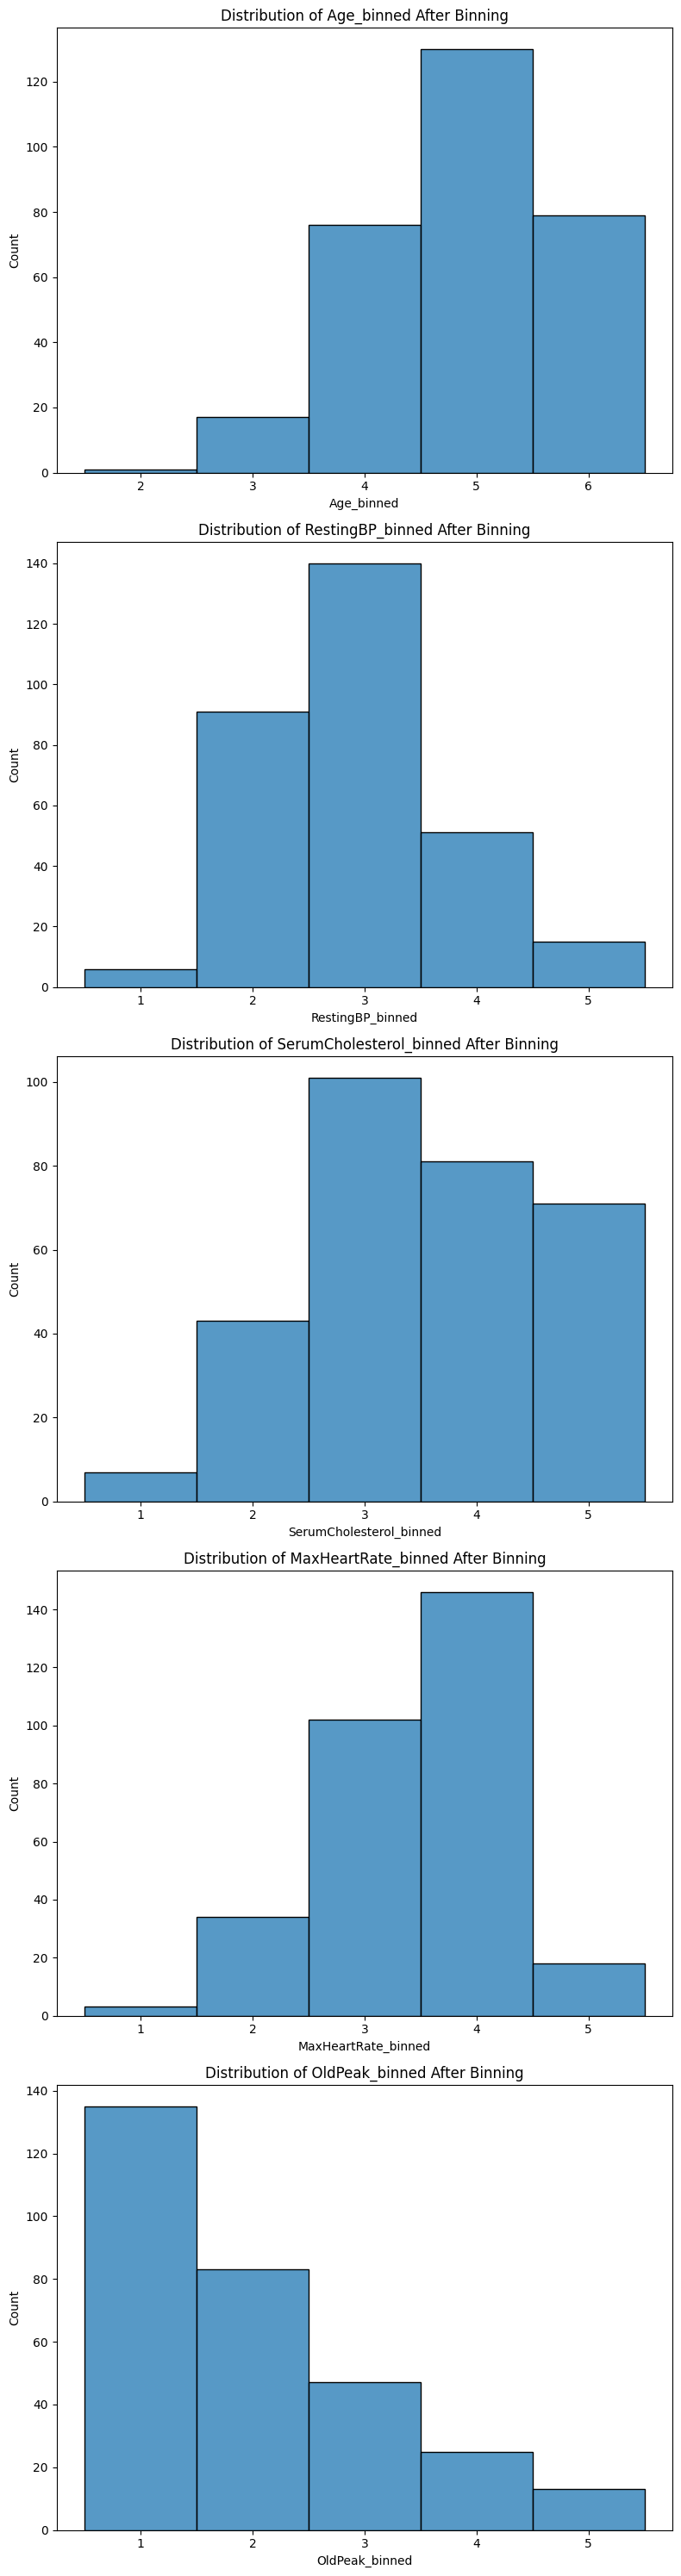

In [ ]:
# C. Data Preperation - 1. Data Transformation
columns_to_binned = ['Age', 'RestingBP', 'SerumCholesterol', 'MaxHeartRate', 'OldPeak']

# # Before:
# print("\n\nBefore Binning: -----------")
# for column in columns_to_binned:
#     print_col(column)

# Visualize before binning
fig, axes = plt.subplots(nrows=len(columns_to_binned), ncols=1, figsize=(8, 6*len(columns_to_binned)))
for i, column in enumerate(columns_to_binned):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {column} Before Binning')
plt.tight_layout()
plt.show()


# Bins for age
age_bins = [10, 20, 30, 40, 50, 60, np.inf]
age_labels = [1, 2, 3, 4, 5, 6]  # Assign numerical labels
df['Age_binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Bins for resting blood pressure
trestbps_bins = [0, 100, 120, 140, 160, np.inf]
trestbps_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['RestingBP_binned'] = pd.cut(df['RestingBP'], bins=trestbps_bins, labels=trestbps_labels, include_lowest=True)

# Bins for serum cholesterol
chol_bins = [0, 160, 200, 240, 280, np.inf]
chol_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['SerumCholesterol_binned'] = pd.cut(df['SerumCholesterol'], bins=chol_bins, labels=chol_labels, include_lowest=True)

# Bins for maximum heart rate achieved
thalach_bins = [0, 90, 120, 150, 180, np.inf]
thalach_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['MaxHeartRate_binned'] = pd.cut(df['MaxHeartRate'], bins=thalach_bins, labels=thalach_labels, include_lowest=True)

# Bins for ST depression induced by exercise
oldpeak_bins = [0, 0.5, 1.5, 2.5, 3.5, np.inf]
oldpeak_labels = [1, 2, 3, 4, 5]  # Assign numerical labels
df['OldPeak_binned'] = pd.cut(df['OldPeak'], bins=oldpeak_bins, labels=oldpeak_labels, include_lowest=True)

# Drop original numerical columns
df = df.drop(['Age', 'RestingBP', 'SerumCholesterol', 'MaxHeartRate', 'OldPeak'], axis=1)



columns_binned = ['Age_binned', 'RestingBP_binned', 'SerumCholesterol_binned', 'MaxHeartRate_binned', 'OldPeak_binned']
# After:
# print("\n\nAfter Binning: -----------")
# for column in columns_binned:
#     print_col(column)

# Visualize after binning
fig, axes = plt.subplots(nrows=len(columns_binned), ncols=1, figsize=(8, 6*len(columns_binned)))
for i, column in enumerate(columns_binned):
    sns.histplot(df[column], ax=axes[i], kde=False, bins=None)
    axes[i].set_title(f'Distribution of {column} After Binning')
plt.tight_layout()
plt.show()



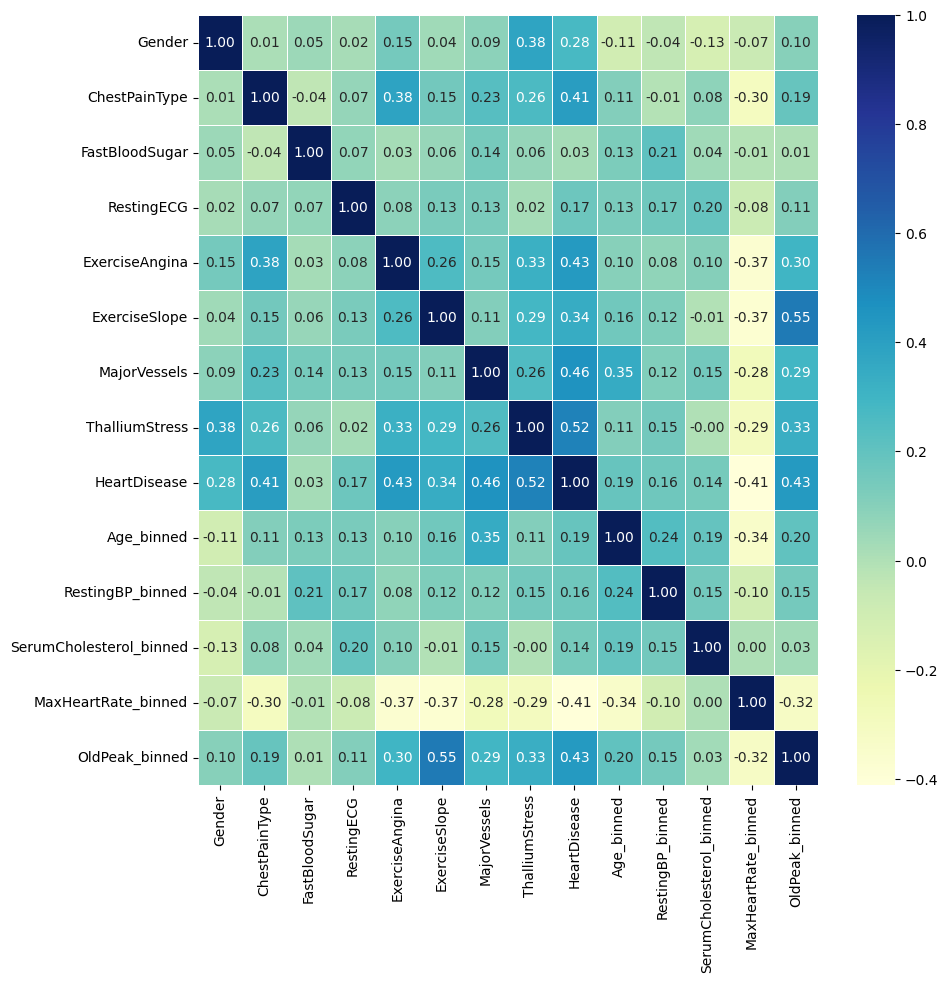

In [ ]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()
plt.show()

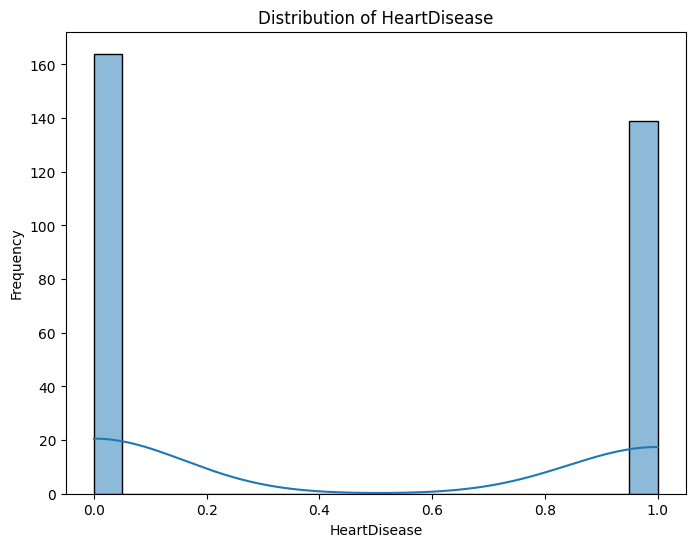

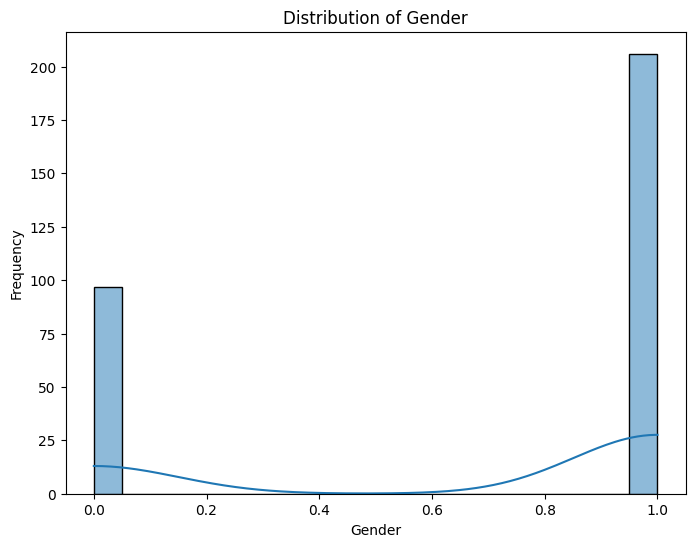

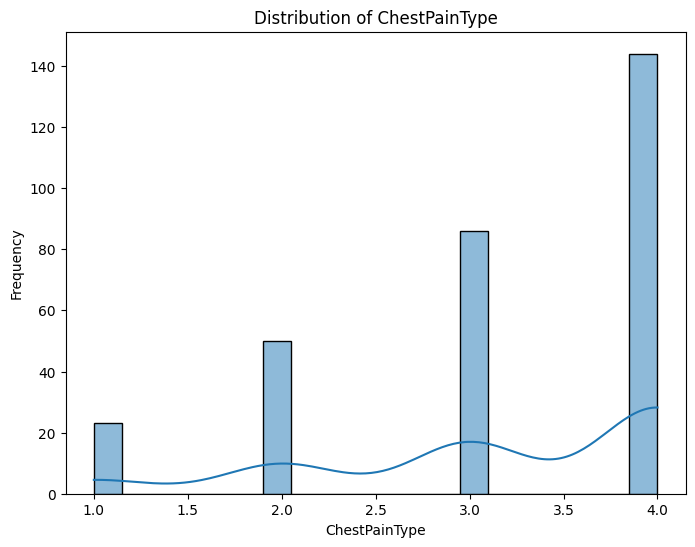

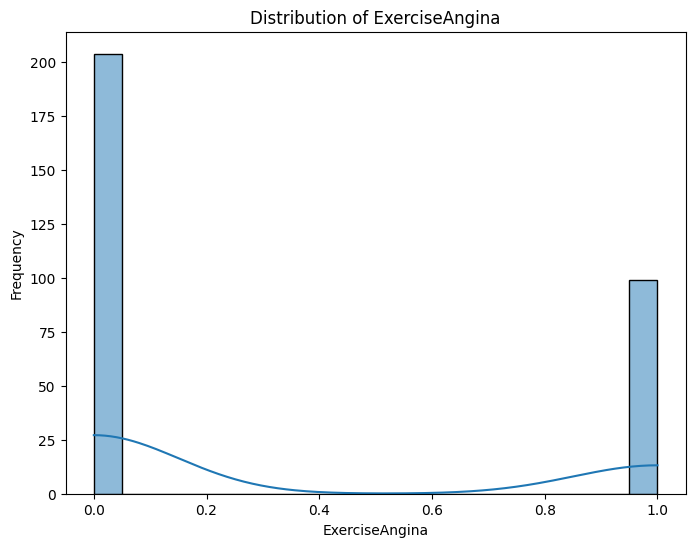

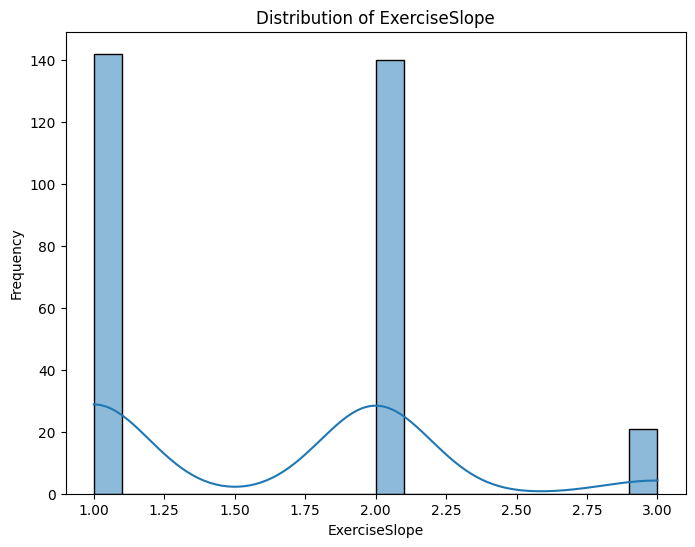

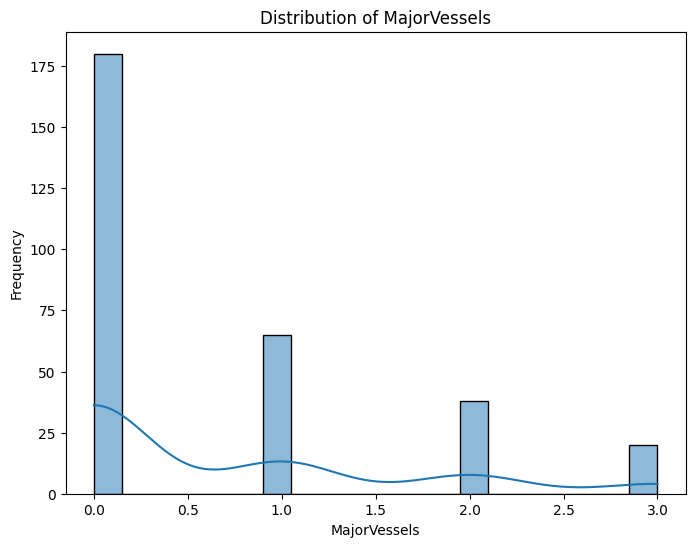

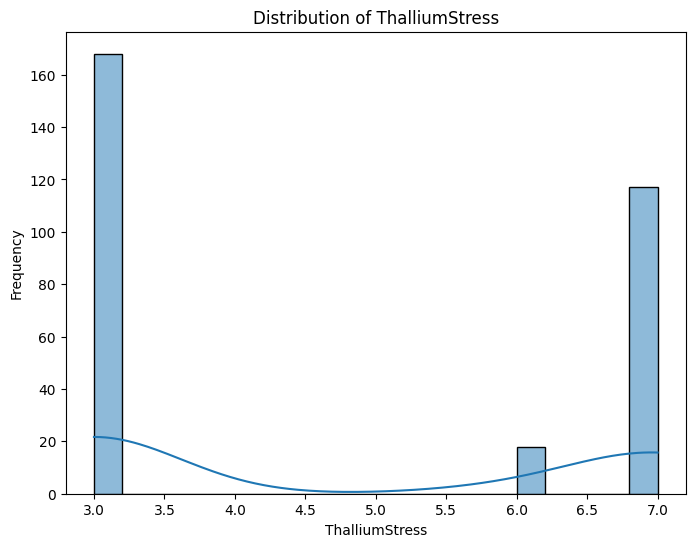

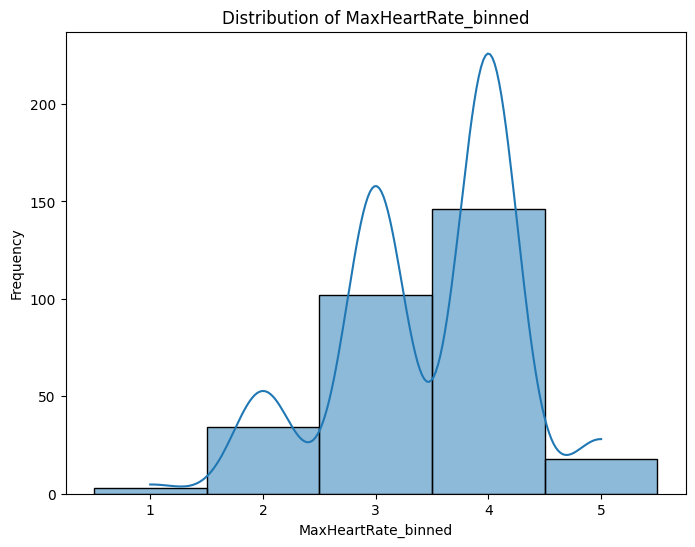

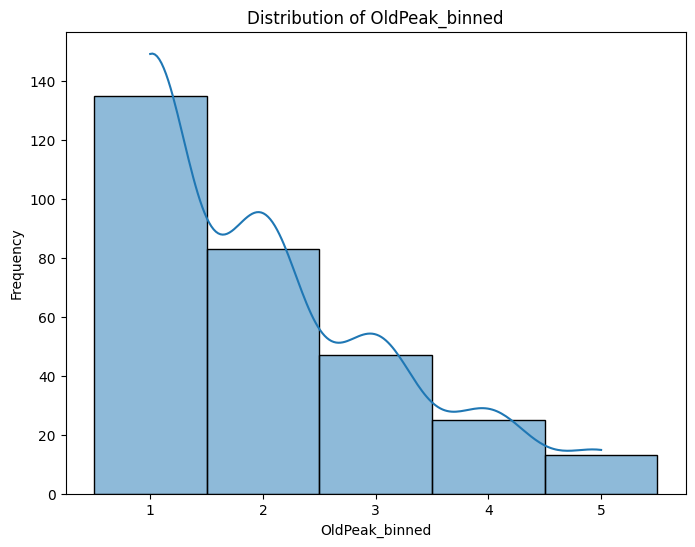

In [ ]:
# In the correlation matrix, these attributes were +/- 0.2.
correlated_features = ['HeartDisease','Gender', 'ChestPainType', 'ExerciseAngina', 'ExerciseSlope',
                     'MajorVessels', 'ThalliumStress', 'MaxHeartRate_binned', 'OldPeak_binned']

# Clean and Simple Histograms
for column in correlated_features:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(df[column], ax=ax, kde=True, bins=20)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plt.show()

## C.3 Data Splitting
1. Include relavent features to use
2. Scale the data
3. Set a seed for reproducibility
4. Split dataset into training 80% and test set 20%

In [ ]:
# Select only the relevant features
relevant_features = ['Gender', 'ChestPainType', 'ExerciseAngina', 'ExerciseSlope',
                     'MajorVessels', 'ThalliumStress', 'MaxHeartRate_binned', 'OldPeak_binned']
X = df[relevant_features]
y = df['HeartDisease']

# Scaling the data improves stability, consistency and performance.
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Same random number generated every time: Reproducibility
np.random.seed(564)

# Split data using the fixed random state
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=200)

# D. Modelling
1. Train Data
2. Print Results

+++++++++++++ 1. Logistic Regression +++++++++++++
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[23  5]
 [ 6 27]]
Logistic Regression - Test Accuracy: 0.820
Logistic Regression - Cross-Validation Accuracy: 0.839



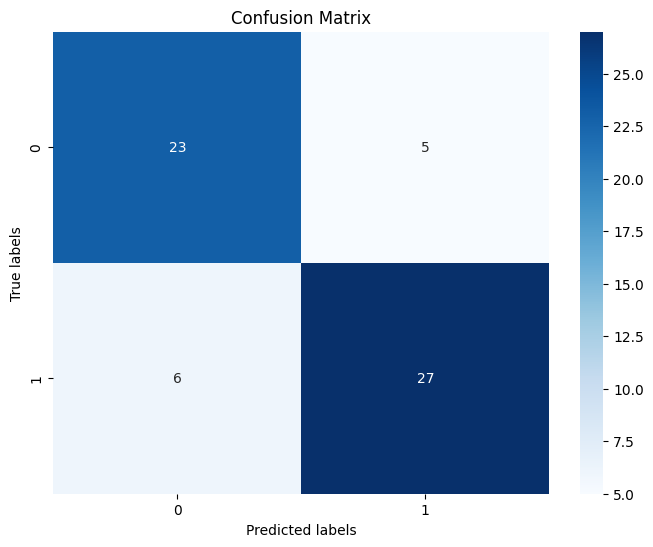

+++++++++++++ 2. Decision Tree +++++++++++++
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[23  5]
 [ 6 27]]
Decision Tree - Test Accuracy: 0.820
Decision Tree - Cross-Validation Accuracy: 0.809



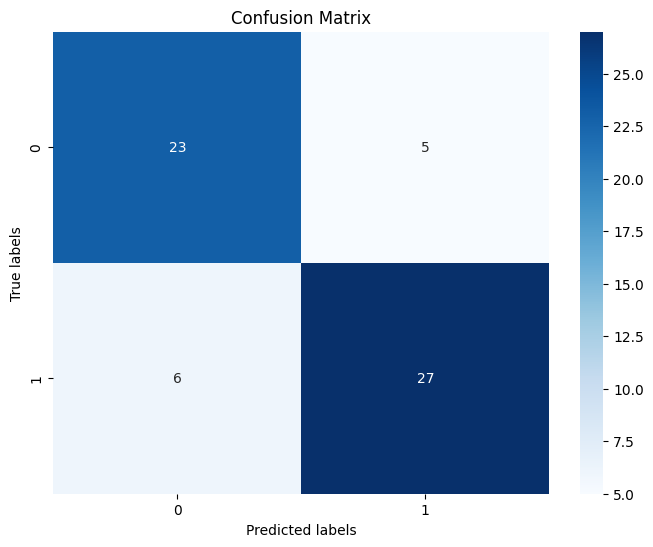

+++++++++++++ 3. SVM +++++++++++++
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
 [[24  4]
 [ 8 25]]
SVM - Test Accuracy: 0.803
SVM - Cross-Validation Accuracy: 0.829



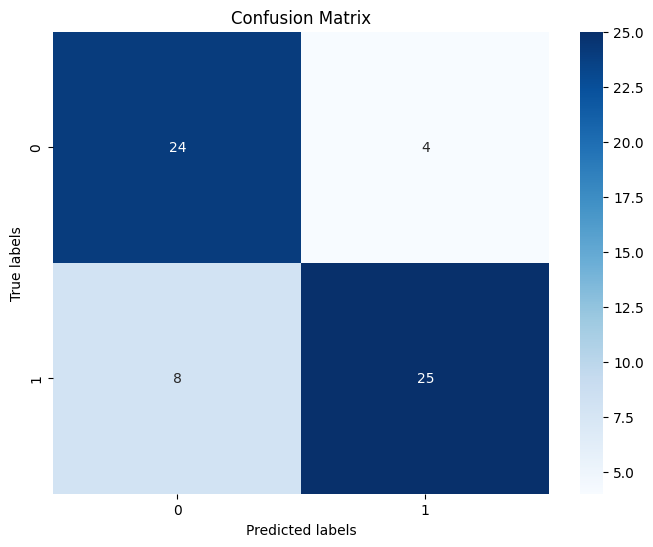

Best Model: Logistic Regression - 
Cross-Validation Accuracy: 0.820 , Test Accuracy: 0.839


In [ ]:
# All models used
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}
modelPerformance = {}
precision_scores_class0 = {}
recall_scores_class0 = {}
f1_scores_class0 = {}
precision_scores_class1 = {}
recall_scores_class1 = {}
f1_scores_class1 = {}
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=200)


count = 0
# Fit the models
for model_name, model in models.items():
    count += 1
    print(f"+++++++++++++ {count}. {model_name} +++++++++++++")
    # Normal method: Train and evaluate the model on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Compute classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Compute confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", con_matrix)
    print(f"{model_name} - Test Accuracy: {test_accuracy:.3f}")

    # Extract precision, recall, and F1 score from the report for each class
    precision_class0 = report['0']['precision']
    recall_class0 = report['0']['recall']
    f1_class0 = report['0']['f1-score']
    precision_class1 = report['1']['precision']
    recall_class1 = report['1']['recall']
    f1_class1 = report['1']['f1-score']

    precision_scores_class0[model_name] = precision_class0
    recall_scores_class0[model_name] = recall_class0
    f1_scores_class0[model_name] = f1_class0
    precision_scores_class1[model_name] = precision_class1
    recall_scores_class1[model_name] = recall_class1
    f1_scores_class1[model_name] = f1_class1


    # StratifiedKFold for cross-validation
    cv_scores = cross_val_score(model, X, y, cv=skf)
    avg_cv_score = cv_scores.mean()
    print(f"{model_name} - Cross-Validation Accuracy: {avg_cv_score:.3f}")
    modelPerformance[model_name] = (test_accuracy, avg_cv_score)
    print()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(con_matrix, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()

# Find and print the best model based on cross-validation score
best_model_name = max(modelPerformance, key=lambda x: modelPerformance[x])
best_model_cv_accuracy, best_model_test_accuracy = modelPerformance[best_model_name]
print(f"Best Model: {best_model_name} - ")
print(f"Cross-Validation Accuracy: {best_model_cv_accuracy:.3f} , Test Accuracy: {best_model_test_accuracy:.3f}")

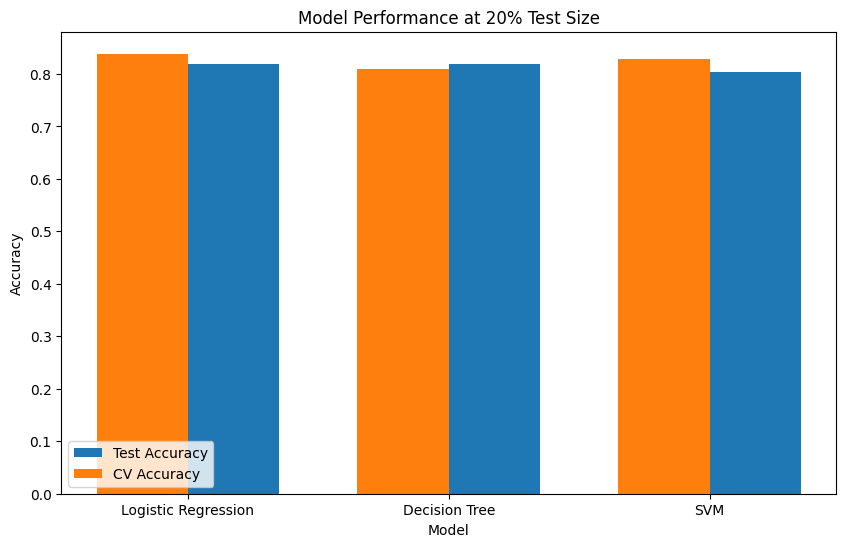

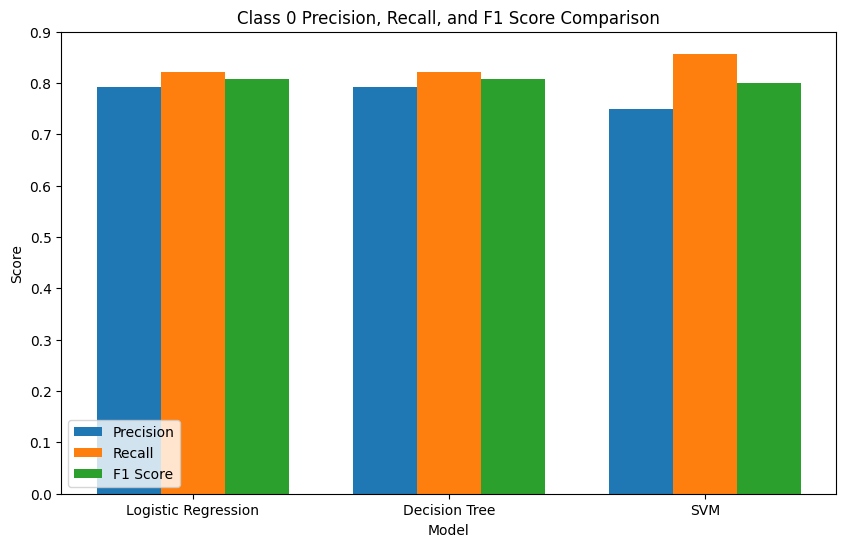

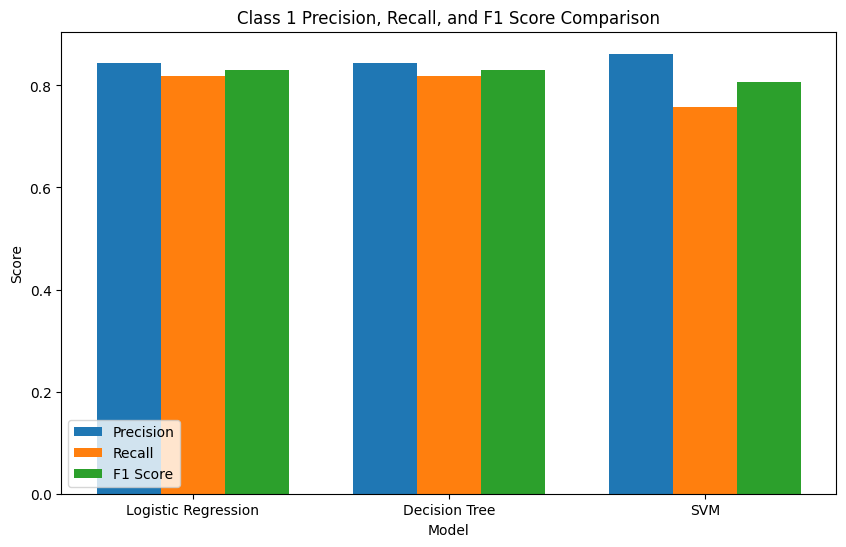

In [ ]:
# Separate cross-validation and test accuracies
test_accuracies = [modelPerformance[model][0] for model in models]
cv_accuracies = [modelPerformance[model][1] for model in models]

# Plot cross-validation and test accuracy bars
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
bar_width = 0.35
ax.bar(x + bar_width/2, test_accuracies, bar_width, label='Test Accuracy')
ax.bar(x - bar_width/2, cv_accuracies, bar_width, label='CV Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance at 20% Test Size')
ax.legend(loc='lower left')
plt.show()

# Plot precision, recall, and F1 score bars for Class 0
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
bar_width = 0.25
ax.bar(x - bar_width, [precision_scores_class0[model] for model in models], bar_width, label='Precision')
ax.bar(x, [recall_scores_class0[model] for model in models], bar_width, label='Recall')
ax.bar(x + bar_width, [f1_scores_class0[model] for model in models], bar_width, label='F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Class 0 Precision, Recall, and F1 Score Comparison')
ax.legend(loc='lower left')
plt.show()

# Plot precision, recall, and F1 score bars for Class 1
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
bar_width = 0.25
ax.bar(x - bar_width, [precision_scores_class1[model] for model in models], bar_width, label='Precision')
ax.bar(x, [recall_scores_class1[model] for model in models], bar_width, label='Recall')
ax.bar(x + bar_width, [f1_scores_class1[model] for model in models], bar_width, label='F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Class 1 Precision, Recall, and F1 Score Comparison')
ax.legend(loc='lower left')
plt.show()

# Deployment

In [ ]:
relevant_features = ['Gender', 'ChestPainType', 'ExerciseAngina', 'ExerciseSlope',
                     'MajorVessels', 'ThalliumStress', 'MaxHeartRate_binned', 'OldPeak_binned']


def get_user_input_and_predict():
    print("Enter the following values:")

    while True:
        try:
            gender = int(input("Gender (1 for male, 0 for female): \n"
                               "  1: Male\n"
                               "  0: Female\n"
                               "Enter your gender: "))
            if gender in [0, 1]:
                break
            else:
                print("Please enter 0 for female or 1 for male.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            chest_pain_type = int(input("Chest Pain Type (1-4): \n"
                                        "  1: Typical angina\n"
                                        "  2: Atypical angina\n"
                                        "  3: Non-anginal pain\n"
                                        "  4: Asymptomatic\n"
                                        "Enter your chest pain type: "))
            if 1 <= chest_pain_type <= 4:
                break
            else:
                print("Please enter a value between 1 and 4.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            exercise_angina = int(input("Exercise Angina (1 for yes, 0 for no): \n"
                                        "  1: Yes\n"
                                        "  0: No\n"
                                        "Enter your exercise angina status: "))
            if exercise_angina in [0, 1]:
                break
            else:
                print("Please enter 0 for no or 1 for yes.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            exercise_slope = int(input("Exercise Slope (1-3): \n"
                                       "  1: Upsloping\n"
                                       "  2: Flat\n"
                                       "  3: Downsloping\n"
                                       "Enter your exercise slope: "))
            if 1 <= exercise_slope <= 3:
                break
            else:
                print("Please enter a value between 1 and 3.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            major_vessels = int(input("Major Vessels (0-3): \n"
                                      "  0: No major vessels affected\n"
                                      "  1: One major vessel affected\n"
                                      "  2: Two major vessels affected\n"
                                      "  3: Three major vessels affected\n"
                                      "Enter the number of major vessels: "))
            if 0 <= major_vessels <= 3:
                break
            else:
                print("Please enter a value between 0 and 3.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            thallium_stress = int(input("Thallium Stress (3/6/7): \n"
                                       "  3: Normal\n"
                                       "  6: Fixed defect\n"
                                       "  7: Reversible defect\n"
                                       "Enter your thallium stress result: "))
            if thallium_stress in [3, 6, 7]:
                break
            else:
                print("Please enter 3 for normal, 6 for fixed defect, or 7 for reversible defect.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            max_heart_rate_binned = int(input("Max Heart Rate Binned (1-5): \n"
                                            "  1: Less than 90 beats per minute\n"
                                            "  2: 90-119 beats per minute\n"
                                            "  3: 120-149 beats per minute\n"
                                            "  4: 150-179 beats per minute\n"
                                            "  5: More than 180 beats per minute\n"
                                            "Enter your max heart rate binned value: "))
            if 1 <= max_heart_rate_binned <= 5:
                break
            else:
                print("Please enter a value between 1 and 5.")
        except ValueError:
            print("Please enter a numeric value.")

    while True:
        try:
            old_peak_binned = int(input("Old Peak Binned (1-5): \n"
                                      "  1: Less than 0.5 mm\n"
                                      "  2: 0.5-1.4 mm\n"
                                      "  3: 1.5-2.4 mm\n"
                                      "  4: 2.5-3.4 mm\n"
                                      "  5: More than 3.5 mm\n"
                                      "Enter your old peak binned value: "))
            if 1 <= old_peak_binned <= 5:
                break
            else:
                print("Please enter a value between 1 and 5.")
        except ValueError:
            print("Please enter a numeric value.")


    # Create input data list
    input_data = [
        gender,
        chest_pain_type,
        exercise_angina,
        exercise_slope,
        major_vessels,
        thallium_stress,
        max_heart_rate_binned,
        old_peak_binned
    ]
    # Scale the input data using the saved scaler
    scaled_input_data = scaler.transform([input_data])

    # Predict
    model = LogisticRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(scaled_input_data)
    probability = model.predict_proba(scaled_input_data)
    rounded_probability = np.round(probability, 6)
    print("rounded_probability = ", rounded_probability)
    print("\nPrediction Results:")
    print(f"Prediction: {'Yes' if prediction == 1 else 'No'}")
    print(f"Probability of NO Heart Disease (0): {rounded_probability[0, 0]}")
    print(f"Probability of Heart Disease (1): {rounded_probability[0, 1]}")

# Run the function to get user input and predict
get_user_input_and_predict()


Enter the following values:
